In [1]:
def linreg(X,Y):
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]
    
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha = 0.3)
    plt.plot(X2, Y_hat, 'r', alpha=0.9)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    return model.summary()

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

from statsmodels import regression
from statsmodels.stats import diagnostic
import statsmodels.regression as smr
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breushpagan

import scipy as sp
import scipy.stats 
import seaborn
!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.818e+06
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.33e-55
Time:                        14:22:04   Log-Likelihood:                -14.032
No. Observations:                  21   AIC:                             32.06
Df Residuals:                      19   BIC:                             34.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.8856      0.108   -164.884      0.0

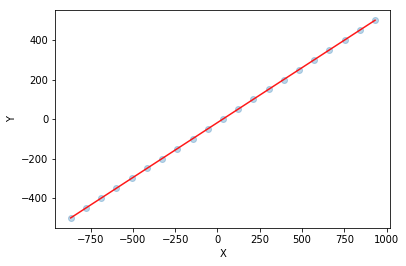

In [7]:
fahrenheit = [-868, -778, -688, -598, -508, -418, -328, -238, -144, -58, 32, 122, 212, 302, 392, 482, 
              572, 662, 752, 842, 932]
celsius    = [-500, -450, -400, -350, -300, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 
              300, 350, 400, 450, 500]

print(linreg(fahrenheit, celsius))

print('celcius = 0.5556 - 17.8856')

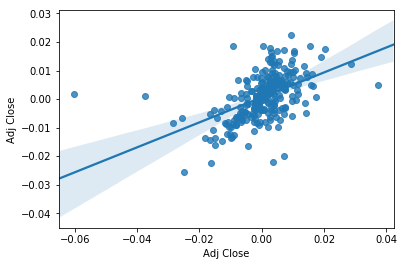

In [8]:
asset = pdr.data.DataReader('KO', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
r_a = asset.pct_change()[1:]
benchmark = pdr.data.DataReader('PEP', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
r_b = benchmark.pct_change()[1:]

seaborn.regplot(r_a, r_b)

In [11]:
X = asset.pct_change()[1:]
Y = benchmark.pct_change()[1:]

result = sm.OLS(Y,X).fit()

# Convert X to Matrix (adding columns of one)
X = np.vstack((X, np.ones( X.size ) ))
X = np.matrix( X )

# Matrix Multiplication and inverse calculation
C = np.linalg.inv( X * X.T )
C *= result.mse_resid
SE = np.sqrt(C) # Calucaltion of Standard Error. 

# Critical Values of the t-statistic
N = result.nobs
P = result.df_model
dof = N - P - 1
z = scipy.stats.t(dof).ppf(0.975)

i = 0
## Your code goes here

# Fetch values of Beta and parameters of SE from the matrix
beta = result.params[i]
c = SE[i,i]

print(beta - z * c, beta + z * c)

0.3460494766153309 0.5320838978568315


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


In [16]:
asset1 = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
returns1 = asset.pct_change()[1:]
asset2 = pdr.data.DataReader('GS', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
returns2 = benchmark.pct_change()[1:]

results = smr.linear_model.OLS(returns1.values, sm.add_constant(returns2.values)).fit()
results

In [18]:
lm, p_lm, fv, p_fv = het_breushpagan(results.resid, results.model.exog)
print ('p-value for f-statistic of the breush-pagan test:', p_fv)
print ('===='  )
print ("Since the p-value obtained is greater than alpha (0.05), \
we can't reject the null hypothesis of the breush-pagan test, and state that there is \
no presence of heteroskedasticity")

p-value for f-statistic of the breush-pagan test: 0.9106916862021442
====
Since the p-value obtained is greater than alpha (0.05), we can't reject the null hypothesis of the breush-pagan test, and state that there is no presence of heteroskedasticity


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  """Entry point for launching an IPython kernel.


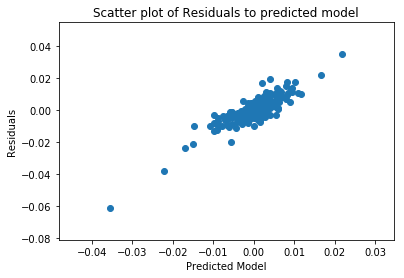

In [19]:
# Predicted values of asset1
y = results.params[0] + results.params[1]*returns1.values

plt.scatter(y, results.resid)
plt.title('Scatter plot of Residuals to predicted model')
plt.xlabel('Predicted Model')
plt.ylabel('Residuals');

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')


p-value for f-statistic of the breush-pagan test: 2.0337492383846815e-06
====
Since the p-value obtained is less than alpha (0.05), we reject the null hypothesis of the breush-pagan test, and state that there is presence of heteroskedasticity


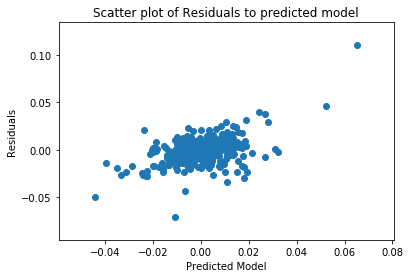

In [21]:
p1 = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2005,1,1), end=datetime(2010,1,1)).iloc[:, -1].pct_change()[1:]

p2 = pdr.data.DataReader('XLF', data_source='yahoo', start=datetime(2005,1,1), end=datetime(2010,1,1)).iloc[:, -1].pct_change()[1:]


## Your code goes here
results2 = smr.linear_model.OLS(p1, sm.add_constant(p2)).fit()

y = results2.params[0] + results2.params[1]*p1

res = results2.resid

plt.scatter(y, res)
plt.title('Scatter plot of Residuals to predicted model')
plt.xlabel('Predicted Model')
plt.ylabel('Residuals')

lm, p_lm, fv, p_fv = het_breushpagan(results2.resid, results2.model.exog)
print ('p-value for f-statistic of the breush-pagan test:', p_fv)
print ('===='  )
print ("Since the p-value obtained is less than alpha (0.05), \
we reject the null hypothesis of the breush-pagan test, and state that there is \
presence of heteroskedasticity")

